# Problem 4

In [1]:
%matplotlib inline

# load relevant packages
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
# load test and train data
Xtrain = np.load("hw3_housing/housing_train_features.npy")
Xtest = np.load("hw3_housing/housing_test_features.npy")
ytrain = np.load("hw3_housing/housing_train_labels.npy")
ytest = np.load("hw3_housing/housing_test_labels.npy")

In [3]:
# define features and dimensions
nfeatures = Xtrain.shape[0]
ntrain = Xtrain.shape[1]
ntest = Xtest.shape[1]

# print
print('nfeatures: {} \nntrain: {} \nntest: {}\n'.format(nfeatures,ntrain,ntest))

# computation of statistics of the data
Xtrain_mean = np.mean(Xtrain,axis = 1)
Xtrain_std = np.std(Xtrain, axis = 1)

# sphere the data
Xtrain_sphere = ((Xtrain.T - Xtrain_mean)/Xtrain_std).T

nfeatures: 58 
ntrain: 2000 
ntest: 925



In [4]:
# define functions

def sq_error(x, y, w0, w, reg_const, ntrain):
     return 1/ntrain*np.sum([(y[j] - (w0+x[:,j].dot(w.T)))**2 for j in range(ntrain)])
     

def coordinate_descent(x, y, reg_const, cycles, ntrain, nfeatures):
    w0 = np.sum(y)/ntrain      # bias term

    w_history = np.zeros([nfeatures,cycles*nfeatures+1])
    w_new = np.ones(nfeatures) # set initial weights to ones
    w_history[:,0] = w_new
    
    sq_error_history = np.zeros(cycles*nfeatures+1)
    sq_error_history[0] = sq_error(x, y, w0, w_new, reg_const, ntrain)
    
    for k in range(cycles):
        for i in range(nfeatures):
            # compute the constants ci and ai
            ci = 2*np.sum([x[i,j]*( y[j] - (w0+x[:,j].dot(w_new.T)-x[i,j]*w_new[i]) ) for j in range(ntrain)])
            ai = 2*np.sum(x[i,:]**2)
            
            # update w
            w_new[i] = ci/(ai+2*reg_const)
            
            # store the histories
            w_history[:,k*nfeatures+i+1] = w_new
            sq_error_history[k*nfeatures+i+1] = sq_error(x, y, w0, w_new, reg_const, ntrain)
    return w0, w_new, w_history, sq_error_history

        

In [8]:
## part (d)
# problem setup

reg_const = 100
cycles = 50
w0, w, w_history, sq_error_history = coordinate_descent(Xtrain_sphere, ytrain, reg_const, cycles, ntrain, nfeatures)

# transform xtest
Xtest_new = ((Xtest.T - Xtrain_mean)/Xtrain_std).T
final_mse_test = 1/ntest*np.sum([(ytest[j] - (w0+Xtest_new[:,j].dot(w.T)))**2 for j in range(ntest)])
print('Final test MSE: {}'.format(final_mse_test))

Final test MSE: 751.1933845652543


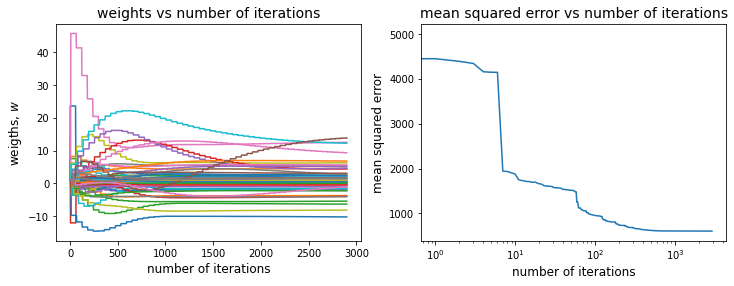

In [7]:
# plots    
iterations = np.arange(nfeatures*cycles+1)

fig, axs = plt.subplots(1, 2, figsize = (12,4)) 
axs[0].plot(iterations,w_history.T)
axs[0].set_xlabel('number of iterations', fontsize=12)
axs[0].set_ylabel('weigths, $w$', fontsize=12)
axs[0].set_title('weights vs number of iterations',fontsize=14)

axs[1].semilogx(iterations,sq_error_history)
axs[1].set_xlabel('number of iterations', fontsize=12)
axs[1].set_ylabel('mean squared error', fontsize=12)
axs[1].set_title('mean squared error vs number of iterations',fontsize=14)

plt.savefig('prob4d.png')